In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
import matplotlib.dates as mdates

# Veriyi yfinance üzerinden çektim
msft = yf.download('MSFT', start='2000-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# Kapanış fiyatlarını kullandım
data = msft['Close'].values.reshape(-1, 1)
dates = msft.index  # Tarihleri alıyoruz

# Veriyi ölçeklendirdim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Eğitim ve test verilerini oluşturdum
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Veri setini LSTM modeline uygun hale getirdim
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


[*********************100%%**********************]  1 of 1 completed


In [2]:
# LSTM modelini oluşturdum
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Modeli derledim
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğittim
model_lstm.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.2252e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 3.2108e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 2.6156e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.4687e-05
Epoch 5/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 2.6463e-05
Epoch 6/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.4144e-05
Epoch 7/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.3939e-05
Epoch 8/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.0591e-05
Epoch 9/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.0875e-05
Epoch 10/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.1466e-05


In [3]:
# GRU modelinin oluşturulması
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

# Modelin derlenmesi
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Modelin eğitilmesi
model_gru.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)


Epoch 1/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 2.2492e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 4.4155e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.5911e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.4041e-05
Epoch 5/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.6569e-05
Epoch 6/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.5397e-05
Epoch 7/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.1311e-05
Epoch 8/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.0351e-05
Epoch 9/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 1114s 228ms/step - loss: 1.0503e-05
Epoch 10/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 9.9779e-06


In [4]:
# LSTM eğitim ve test tahminlerini yaptım
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

# GRU eğitim ve test tahminlerini yaptım
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Veriyi geri ölçeklendirdim
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Performans değerlendirmesi yaptım
rmse_lstm = np.sqrt(mean_squared_error(y_test[0], test_predict_lstm[:, 0]))
rmse_gru = np.sqrt(mean_squared_error(y_test[0], test_predict_gru[:, 0]))
print(f'RMSE (LSTM): {rmse_lstm}')
print(f'RMSE (GRU): {rmse_gru}')


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE (LSTM): 34.52298688244406
RMSE (GRU): 55.76632626983495


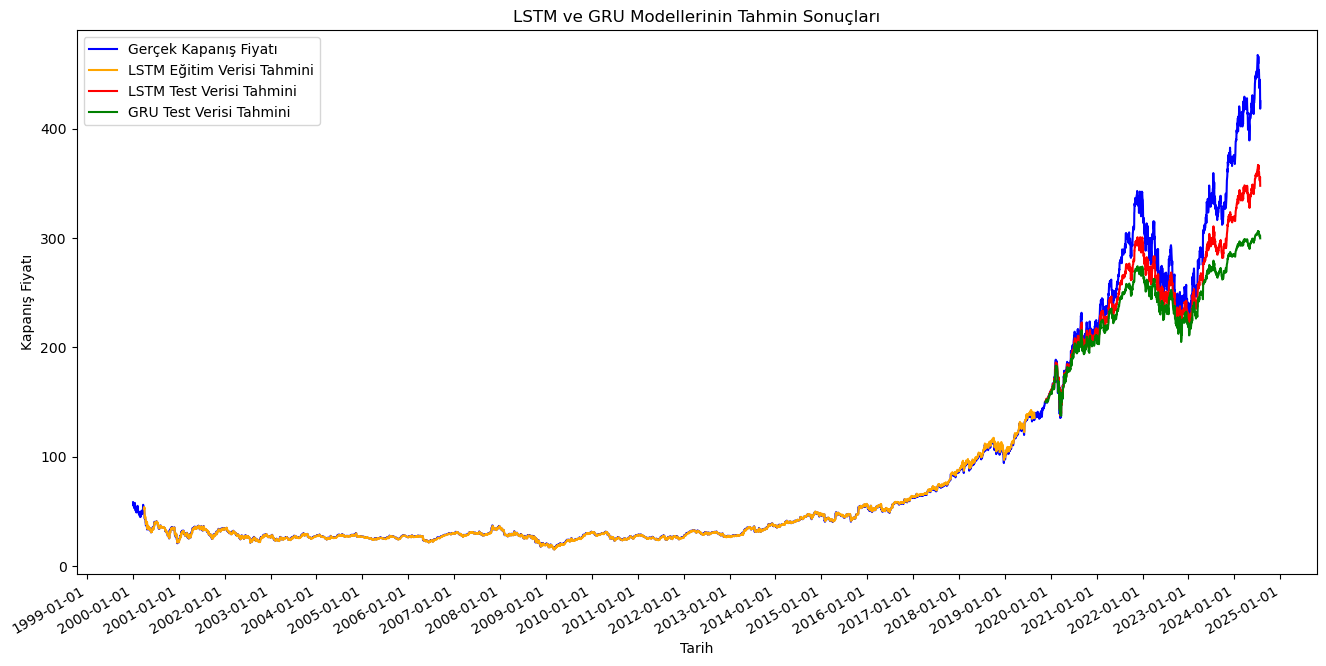

In [5]:
# Tahminlerin ve gerçek verilerin grafik olarak gösterdim
train_data_plot = np.empty_like(data)
train_data_plot[:, :] = np.nan
train_data_plot[time_step:len(train_predict_lstm) + time_step, :] = train_predict_lstm

test_data_plot_lstm = np.empty_like(data)
test_data_plot_lstm[:, :] = np.nan
test_data_plot_lstm[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1, :] = test_predict_lstm

test_data_plot_gru = np.empty_like(data)
test_data_plot_gru[:, :] = np.nan
test_data_plot_gru[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1, :] = test_predict_gru

plt.figure(figsize=(16, 8))
plt.plot(dates, data, label='Gerçek Kapanış Fiyatı', color='blue')
plt.plot(dates[time_step:len(train_predict_lstm) + time_step], train_data_plot[time_step:len(train_predict_lstm) + time_step], label='LSTM Eğitim Verisi Tahmini', color='orange')
plt.plot(dates[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1], test_data_plot_lstm[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1], label='LSTM Test Verisi Tahmini', color='red')
plt.plot(dates[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1], test_data_plot_gru[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1], label='GRU Test Verisi Tahmini', color='green')

# Tarih formatını ayarladım
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  

plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.title('LSTM ve GRU Modellerinin Tahmin Sonuçları')
plt.show()


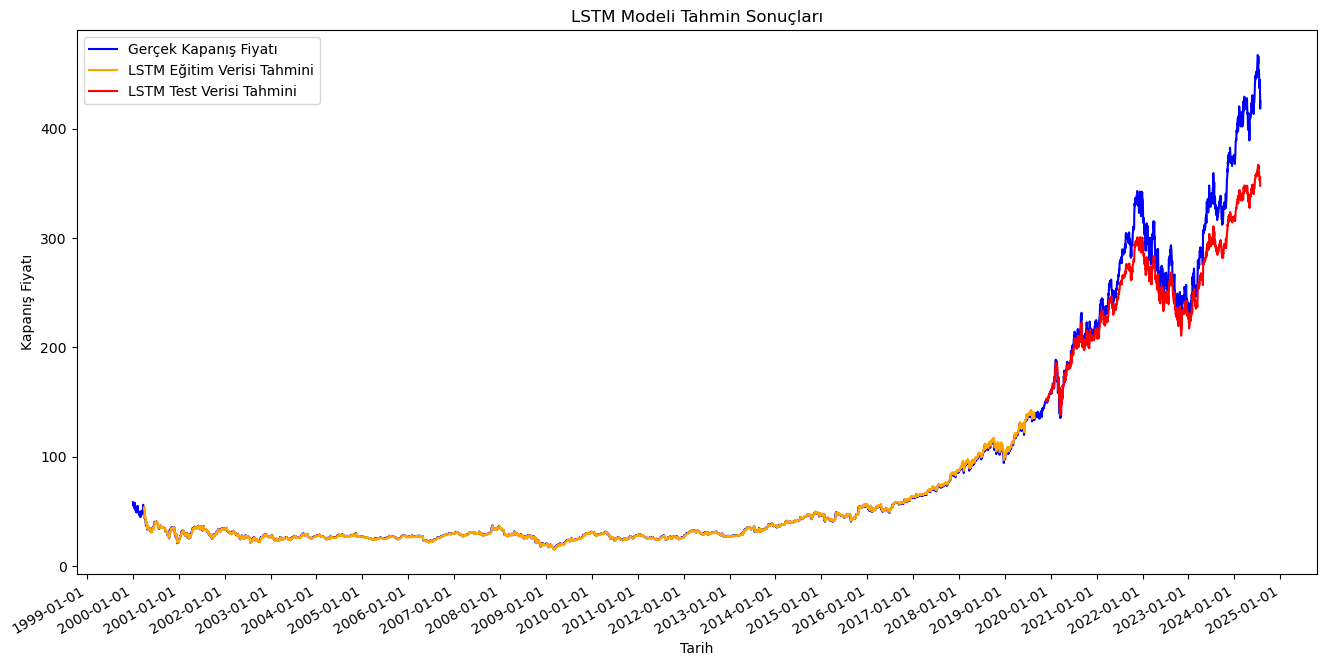

In [6]:
# LSTM tahminlerini  garfiksel olarak gösterdim
train_data_plot_lstm = np.empty_like(data)
train_data_plot_lstm[:, :] = np.nan
train_data_plot_lstm[time_step:len(train_predict_lstm) + time_step, :] = train_predict_lstm

test_data_plot_lstm = np.empty_like(data)
test_data_plot_lstm[:, :] = np.nan
test_data_plot_lstm[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1, :] = test_predict_lstm

plt.figure(figsize=(16, 8))
plt.plot(dates, data, label='Gerçek Kapanış Fiyatı', color='blue')
plt.plot(dates[time_step:len(train_predict_lstm) + time_step], train_data_plot_lstm[time_step:len(train_predict_lstm) + time_step], label='LSTM Eğitim Verisi Tahmini', color='orange')
plt.plot(dates[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1], test_data_plot_lstm[len(train_predict_lstm) + (time_step * 2) + 1:len(data) - 1], label='LSTM Test Verisi Tahmini', color='red')

# Tarih formatını ayarladım
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() 
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.title('LSTM Modeli Tahmin Sonuçları')
plt.show()


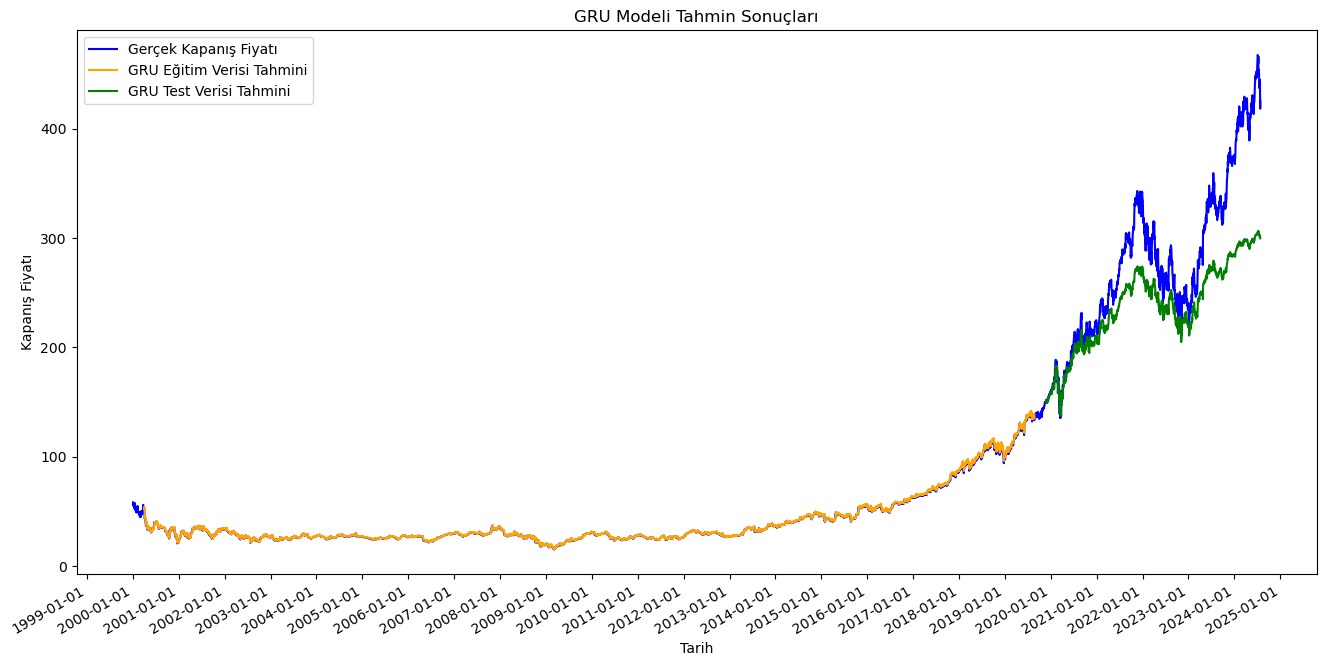

In [7]:
# GRU tahminlerinin görselleştirdim
train_data_plot_gru = np.empty_like(data)
train_data_plot_gru[:, :] = np.nan
train_data_plot_gru[time_step:len(train_predict_gru) + time_step, :] = train_predict_gru

test_data_plot_gru = np.empty_like(data)
test_data_plot_gru[:, :] = np.nan
test_data_plot_gru[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1, :] = test_predict_gru

plt.figure(figsize=(16, 8))
plt.plot(dates, data, label='Gerçek Kapanış Fiyatı', color='blue')
plt.plot(dates[time_step:len(train_predict_gru) + time_step], train_data_plot_gru[time_step:len(train_predict_gru) + time_step], label='GRU Eğitim Verisi Tahmini', color='orange')
plt.plot(dates[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1], test_data_plot_gru[len(train_predict_gru) + (time_step * 2) + 1:len(data) - 1], label='GRU Test Verisi Tahmini', color='green')

# Tarih formatını ayarladım
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Tarih etiketlerini döndür

plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.title('GRU Modeli Tahmin Sonuçları')
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

# LSTM Model Performansı
mse_lstm = mean_squared_error(y_test[0], test_predict_lstm[:, 0])
rmse_lstm = np.sqrt(mse_lstm)

# GRU Model Performansı
mse_gru = mean_squared_error(y_test[0], test_predict_gru[:, 0])
rmse_gru = np.sqrt(mse_gru)

print(f'LSTM Modeli için MSE: {mse_lstm}')
print(f'LSTM Modeli için RMSE: {rmse_lstm}')
print(f'GRU Modeli için MSE: {mse_gru}')
print(f'GRU Modeli için RMSE: {rmse_gru}')


LSTM Modeli için MSE: 1191.8366232854046
LSTM Modeli için RMSE: 34.52298688244406
GRU Modeli için MSE: 3109.883145633684
GRU Modeli için RMSE: 55.76632626983495


[*********************100%%**********************]  1 of 1 completed


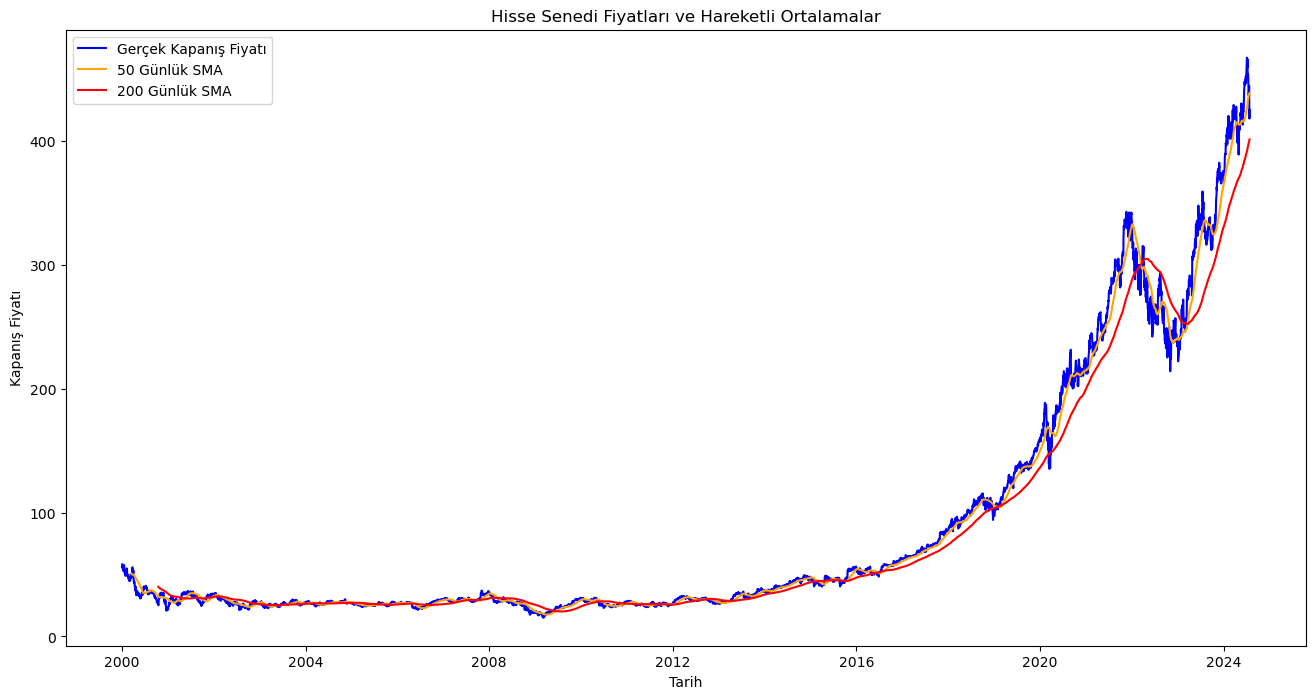

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

msft = yf.download('MSFT', start='2000-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# Basit Hareketli Ortalama (SMA) ekledim
sma_short_window = 50  
sma_long_window = 200  

msft['SMA50'] = msft['Close'].rolling(window=sma_short_window).mean()
msft['SMA200'] = msft['Close'].rolling(window=sma_long_window).mean()

# Hareketli ortalamaların görselleştirdim
plt.figure(figsize=(16, 8))
plt.plot(msft.index, msft['Close'], label='Gerçek Kapanış Fiyatı', color='blue')
plt.plot(msft.index, msft['SMA50'], label='50 Günlük SMA', color='orange')
plt.plot(msft.index, msft['SMA200'], label='200 Günlük SMA', color='red')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Hisse Senedi Fiyatları ve Hareketli Ortalamalar')
plt.legend()
plt.show()


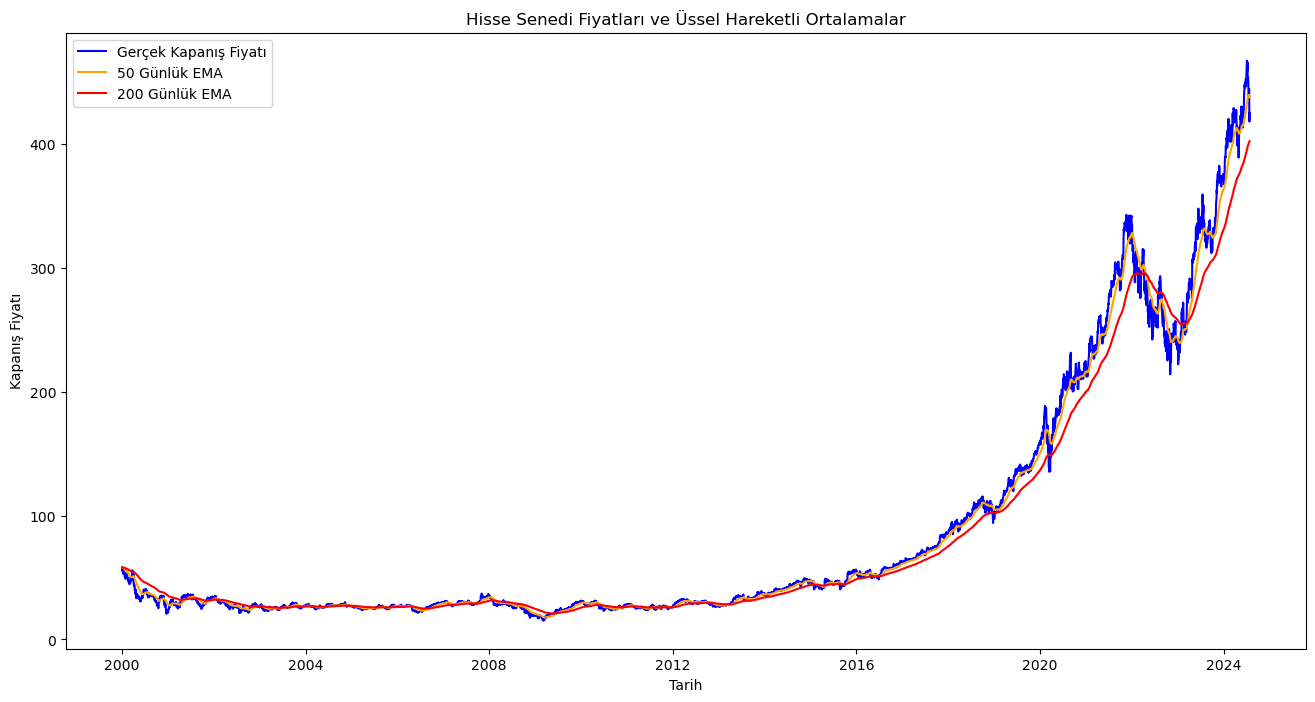

In [10]:
# Üssel Hareketli Ortalama (EMA) ekledim
ema_short_window = 50  # Kısa dönem EMA
ema_long_window = 200  # Uzun dönem EMA

msft['EMA50'] = msft['Close'].ewm(span=ema_short_window, adjust=False).mean()
msft['EMA200'] = msft['Close'].ewm(span=ema_long_window, adjust=False).mean()

# Hareketli ortalamaların görselleştirdim
plt.figure(figsize=(16, 8))
plt.plot(msft.index, msft['Close'], label='Gerçek Kapanış Fiyatı', color='blue')
plt.plot(msft.index, msft['EMA50'], label='50 Günlük EMA', color='orange')
plt.plot(msft.index, msft['EMA200'], label='200 Günlük EMA', color='red')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Hisse Senedi Fiyatları ve Üssel Hareketli Ortalamalar')
plt.legend()
plt.show()


In [11]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 2.3761e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 3.6995e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 2.4550e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.6976e-05
Epoch 5/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.6394e-05
Epoch 6/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.4041e-05
Epoch 7/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.2473e-05
Epoch 8/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.6098e-05
Epoch 9/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.0918e-05
Epoch 10/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 528s 108ms/step - loss: 1.0049e-05
Epoch 1/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 525s 107ms/step - loss: 1.0352e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 2.4397e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.3672e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 

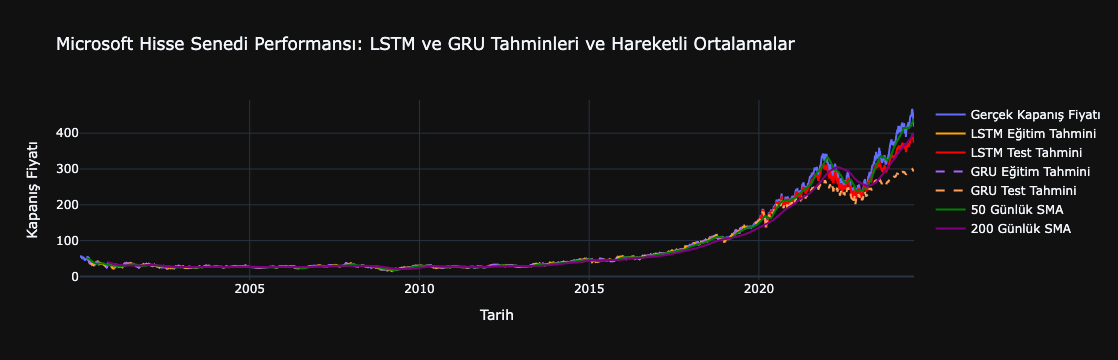

In [12]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

msft = yf.download('MSFT', start='2000-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))


data = msft['Close'].values.reshape(-1, 1)
dates = msft.index


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)


model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)


train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)


train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])


sma_short_window = 50
sma_long_window = 200
msft['SMA50'] = msft['Close'].rolling(window=sma_short_window).mean()
msft['SMA200'] = msft['Close'].rolling(window=sma_long_window).mean()

# Grafikleri oluşturdum
fig = go.Figure()

# Gerçek kapanış fiyatı
fig.add_trace(go.Scatter(x=msft.index, y=msft['Close'], mode='lines', name='Gerçek Kapanış Fiyatı'))

# LSTM Tahminleri
fig.add_trace(go.Scatter(x=msft.index[time_step:len(train_predict_lstm) + time_step], y=train_predict_lstm.flatten(), mode='lines', name='LSTM Eğitim Tahmini', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=msft.index[len(train_predict_lstm) + (time_step * 2) + 1:len(msft) - 1], y=test_predict_lstm.flatten(), mode='lines', name='LSTM Test Tahmini', line=dict(color='red')))

# GRU Tahminleri
fig.add_trace(go.Scatter(x=msft.index[time_step:len(train_predict_gru) + time_step], y=train_predict_gru.flatten(), mode='lines', name='GRU Eğitim Tahmini', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=msft.index[len(train_predict_gru) + (time_step * 2) + 1:len(msft) - 1], y=test_predict_gru.flatten(), mode='lines', name='GRU Test Tahmini', line=dict(dash='dash')))

# Hareketli Ortalamalar
fig.add_trace(go.Scatter(x=msft.index, y=msft['SMA50'], mode='lines', name='50 Günlük SMA', line=dict(color='green')))
fig.add_trace(go.Scatter(x=msft.index, y=msft['SMA200'], mode='lines', name='200 Günlük SMA', line=dict(color='purple')))

fig.update_layout(title='Microsoft Hisse Senedi Performansı: LSTM ve GRU Tahminleri ve Hareketli Ortalamalar',
                  xaxis_title='Tarih',
                  yaxis_title='Kapanış Fiyatı',
                  template='plotly_dark')

fig.show()


In [13]:
pip install bokeh


Note: you may need to restart the kernel to use updated packages.


In [14]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.layouts import column
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense


output_notebook()

msft = yf.download('MSFT', start='2000-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))


data = msft['Close'].values.reshape(-1, 1)
dates = msft.index


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)

model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)


train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)


train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])


sma_short_window = 50
sma_long_window = 200
msft['SMA50'] = msft['Close'].rolling(window=sma_short_window).mean()
msft['SMA200'] = msft['Close'].rolling(window=sma_long_window).mean()


ema_short_window = 50
ema_long_window = 200
msft['EMA50'] = msft['Close'].ewm(span=ema_short_window, adjust=False).mean()
msft['EMA200'] = msft['Close'].ewm(span=ema_long_window, adjust=False).mean()

# Grafikleri oluşturdum
p = figure(width=1000, height=500, x_axis_type='datetime', title='Microsoft Hisse Senedi Performansı: LSTM ve GRU Tahminleri ve Hareketli Ortalamalar')

# Gerçek kapanış fiyatı
p.line(msft.index, msft['Close'], legend_label='Gerçek Kapanış Fiyatı', line_color='blue')

# LSTM Tahminleri
p.line(msft.index[time_step:len(train_predict_lstm) + time_step], train_predict_lstm.flatten(), legend_label='LSTM Eğitim Tahmini', line_color='orange')
p.line(msft.index[len(train_predict_lstm) + (time_step * 2) + 1:len(msft) - 1], test_predict_lstm.flatten(), legend_label='LSTM Test Tahmini', line_color='red')

# GRU Tahminleri
p.line(msft.index[time_step:len(train_predict_gru) + time_step], train_predict_gru.flatten(), legend_label='GRU Eğitim Tahmini', line_color='green', line_dash='dashed')
p.line(msft.index[len(train_predict_gru) + (time_step * 2) + 1:len(msft) - 1], test_predict_gru.flatten(), legend_label='GRU Test Tahmini', line_color='purple', line_dash='dashed')

# Hareketli Ortalamalar
p.line(msft.index, msft['SMA50'], legend_label='50 Günlük SMA', line_color='orange', line_width=2)
p.line(msft.index, msft['SMA200'], legend_label='200 Günlük SMA', line_color='red', line_width=2)
p.line(msft.index, msft['EMA50'], legend_label='50 Günlük EMA', line_color='green', line_width=2)
p.line(msft.index, msft['EMA200'], legend_label='200 Günlük EMA', line_color='purple', line_width=2)

# Araç kutuları ekleme
hover = HoverTool()
hover.tooltips = [("Tarih", "@x{%F}"), ("Fiyat", "@y")]
hover.formatters = {'x': 'datetime'}
p.add_tools(hover)

p.legend.location = 'top_left'
p.legend.click_policy = 'hide'
p.xaxis.axis_label = 'Tarih'
p.yaxis.axis_label = 'Kapanış Fiyatı'

show(p)



Loading BokehJS ...

[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.0090e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 3.3086e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 2.3736e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.8656e-05
Epoch 5/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 2.1440e-05
Epoch 6/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.3954e-05
Epoch 7/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.3715e-05
Epoch 8/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.8126e-05
Epoch 9/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.3351e-05
Epoch 10/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 1.1850e-05
Epoch 1/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 1.1121e-04
Epoch 2/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 2.6122e-05
Epoch 3/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 1.9555e-05
Epoch 4/10
4883/4883 ━━━━━━━━━━━━━━━━━━━━ 25s 5m